<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Random Forest classification</h2>
</div>

## Table of contents 
1. Convert Business Problem to Data Science Problem
2. Load Data
3. Understand the Data
4. Exploratory Data Analysis
5. Data Preprocessing 
6. Model Building 
7. Hyperparameter Tuning    

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Importing Libraries</h2>
</div>

In [1]:
# Basic libraries required
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Convert Business Problem to Data Science Problem</h2>
</div>

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

Here we will be using Decision tree classifier to solve this problem

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Load Data</h2>
</div>

In [2]:
# read the data using read_csv()
data = pd.read_csv("BankChurners.csv", header=0)

In [3]:
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. Understanding Data </h2>


In [4]:
# Shape of the data
data.shape

(10127, 21)

In [5]:
# Summary of the data
data.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>4. Exploratory Data Analysis </h2>
</div>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [7]:
# The attrition_flag is the target column y.
data.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

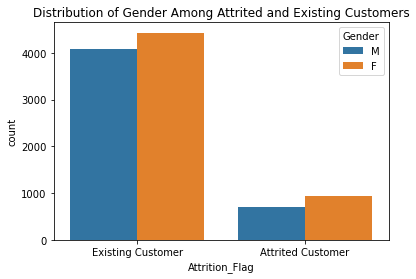

In [8]:
sns.countplot(x='Attrition_Flag', data=data, hue='Gender')
plt.title("Distribution of Gender Among Attrited and Existing Customers")
plt.show()

* The above countplot is plotted on two columns 
1. Attrition_Flag - The Attrition_flag column has 2 types of values in it (Attrited customer, Existing customer)
2. Gender- The Gender column has 2 types of values in it (Male, Female)

* In the above plotting you can observe Existing customers value in the bank is more when compared with Attrited customer
* In both Existing and Attrited customers the female customers are high when compared with male customers


In [9]:
sns.countplot(x='Attrition_Flag', data=data, hue='Marital_Status')
plt.title("Distribution of Marital Status Among Attrited and Existing Customers")
plt.show()

* The above countplot is plotted on two columns 
1. Attrition_Flag - The Attrition_flag column has 2 types of values in it (Attrited customer, Existing customer)
2. Marital_status - The Marital_status column has 4 types of values in it (Married,single,Unknown,Divorced)

* The main Observation in the above plotting is Married customers have more existing accounts in the bank when compared with other categories
* Also the same in Attrited Customer

In [10]:
sns.countplot(x='Attrition_Flag', data=data, hue='Income_Category')
plt.title("Distribution of Income Category Among Attrited and Existing Customers")
plt.show()

* The above countplot is plotted on two columns 

1. Attriton_flag Column
2. Income_category
* From the above plotting the main observation is most of the existing customers in the bank have income range <40k when compared with other customers

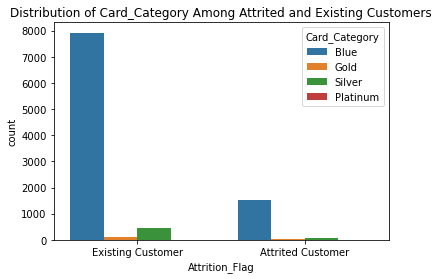

In [11]:
sns.countplot(x='Attrition_Flag', data=data, hue='Card_Category')
plt.title("Distribution of Card_Category Among Attrited and Existing Customers")
plt.show()

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>5. Data Preprocessing</h2>
</div>

In [12]:
from sklearn.model_selection import train_test_split

X = data.drop(["Attrition_Flag", "CLIENTNUM"],axis=1)
y = data.Attrition_Flag


X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape

(8101, 37)

In [14]:
X_train

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
9066            54                1              36                         1   
5814            58                4              48                         1   
792             45                4              36                         6   
1791            34                2              36                         4   
5011            49                2              39                         5   
...            ...              ...             ...                       ...   
5734            44                1              38                         3   
5191            53                3              36                         4   
5390            42                4              32                         3   
860             40                3              28                         4   
7270            53                4              49                         5   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
9066                       3                      3        3723.0   
5814                       4                      3        5396.0   
792                        1                      3       15987.0   
1791                       3                      4        3625.0   
5011                       3                      4        2720.0   
...                      ...                    ...           ...   
5734                       2                      5        4142.0   
5191                       3                      6        7939.0   
5390                       1                      2        2314.0   
860                        1                      1        3563.0   
7270                       1                      2        3858.0   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  ...  \
9066                 1728           1995.0                 0.595  ...   
5814                 1803           3593.0                 0.493  ...   
792                  1648          14339.0                 0.732  ...   
1791                 2517           1108.0                 1.158  ...   
5011                 1926            794.0                 0.602  ...   
...                   ...              ...                   ...  ...   
5734                 2517           1625.0                 0.809  ...   
5191                    0           7939.0                 0.551  ...   
5390                 1547            767.0                 0.804  ...   
860                  1707           1856.0                 0.506  ...   
7270                    0           3858.0                 0.670  ...   

      Income_Category_$120K +  Income_Category_$40K - $60K  \
9066                        0                            0   
5814                        0                            0   
792                         0                            0   
1791                        0                            0   
5011                        0                            1   
...                       ...                          ...   
5734                        0                            1   
5191                        0                            0   
5390                        0                            0   
860                         0                            1   
7270                        0                            0   

      Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
9066                            0                             0   
5814                            0                             0   
792                             0                             0   
1791                            0                             0   
5011                            0                             0   
...                           ...                           ...   
5734                            0                             0   
5191                            0             

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>6. Model Building </h2>
</div>

### 6.1 Random Forest Model 1

In [31]:
# Importing the library
from sklearn.ensemble import RandomForestClassifier

#storing the random forest classifier into clftree
clftree = RandomForestClassifier(random_state=0, n_estimators = 100, max_depth=4, criterion='gini',
                                max_features = 'auto')

In [32]:
#Fitting the model into clftree variable
clftree.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [33]:
clftree.score(X_test,y_test)

0.8963474827245804

### 6.2 Predict values using trained model 1

In [34]:
# Predicting the test and trained values
y_train_pred = clftree.predict(X_train)
y_test_pred = clftree.predict(X_test)

In [35]:
y_train_pred

array(['Existing Customer', 'Existing Customer', 'Existing Customer', ...,
       'Existing Customer', 'Existing Customer', 'Existing Customer'],
      dtype=object)

In [36]:
y_test_pred

array(['Existing Customer', 'Existing Customer', 'Existing Customer', ...,
       'Existing Customer', 'Existing Customer', 'Existing Customer'],
      dtype=object)

### 6.3 Model 1 Performance

In [37]:
# Importing all the required metrics for calculating Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix

In [38]:
confusion_matrix(y_train, y_train_pred)

array([[ 591,  709],
       [  60, 6741]])

In [39]:
confusion_matrix(y_test, y_test_pred)

array([[ 130,  197],
       [  13, 1686]])

In [40]:
# The Accuracy_score
accuracy_score(y_test, y_test_pred)

0.8963474827245804

### Decision Tree Model 2

In [41]:
#storing the random forest classifier into clftree2
clftree2 = RandomForestClassifier(random_state=0, n_estimators = 500, max_depth=4, criterion='gini',
                                max_features = 'auto')
clftree2.fit(X_train, y_train)
clftree2.score(X_test,y_test)

0.8983218163869694

### Random Forest Model 3

In [43]:
#storing the random forest classifier into clftree3
clftree3 = RandomForestClassifier(random_state=0, n_estimators = 500, max_depth=4, criterion='entropy',
                                max_features = 'auto')
clftree3.fit(X_train, y_train)
clftree3.score(X_test,y_test)

0.8993089832181639

### Random Forest Model 4

In [44]:
#storing the random forest classifier into clftree4
clftree4 = RandomForestClassifier(random_state=0, n_estimators = 500, max_depth=6, criterion='entropy',
                                max_features = 'auto')
clftree4.fit(X_train, y_train)
clftree4.score(X_test,y_test)

0.9155972359328727

<a class="anchor" id="8"></a>
<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>7.Hyperparameter Tuning Using GridSearchCV</h2>
</div>

One traditional and popular way to perform hyperparameter tuning is by using an Exhaustive Grid Search from Scikit learn. This method tries every possible combination of each set of hyper-parameters. Using this method, we can find the best set of values in the parameter search space. This usually uses more computational power and takes a long time to run since this method needs to try every combination in the grid size.

In [52]:
# Importing GridsearchCV
from sklearn.model_selection import GridSearchCV

In [53]:
# Assigning all the parameters of random forest classifier for  parameters variable

parameters = {
    'n_estimators' : [100, 500, 1000],
    'max_depth' : [4, 6],
    'criterion' : ['gini', 'entropy'],
    'max_features' : ['sqrt', 'log2']
}

In [54]:
# Assigning parameters for GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(),parameters, scoring='accuracy', verbose=2, cv=3, n_jobs = -1)

In [55]:
# Fitting the model into gridsearchCV
grid_result= grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


**best_index_:** (int) The index (of the cv_results_ arrays) which corresponds to the best candidate parameter setting.


In [56]:
print('Best index: ', grid_result.best_index_)

Best index:  6


**best_params (dict)**: Parameter setting that gave the best results on the hold out data.


In [57]:
print('Best Params: ', grid_result.best_params_)

Best Params:  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}


**best_score (float) :
Mean cross-validated score of the best_estimator**

For multi-metric evaluation, this is present only if refit is specified.

This attribute is not available if refit is a function.

In [58]:
print('Best Score: ', grid_result.best_score_)

Best Score:  0.9217389992732459
